# Chapter: Best Practices

# Topic: K-fold Cross Validation for Model Tuning

In [1]:
# read data
import numpy as np
data = np.loadtxt('quadratic_raw_data.csv', delimiter=',')
x = data[:,0,None]; y = data[:,1,None]

In [2]:
# create pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = Pipeline([('poly', PolynomialFeatures(include_bias=False)),
                 ('scaler', StandardScaler()),
                 ('model', LinearRegression())])

In [3]:
# separate training and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [5]:
# generate k=3 folds on training data
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 3, shuffle = True, random_state = 1)

In [6]:
# compute validation performances using the K folds
from sklearn.metrics import mean_squared_error as mse
overall_fit_MSEs = [] # overall errors for different polynomial degrees  
overall_val_MSEs = []

max_polyDegree = 5
for poly_degree in range(1,max_polyDegree+1):# loop over hyperparameters
    pipe['poly'].degree = poly_degree
    
    split_fit_MSEs = [] # errors for different splits 
    split_val_MSEs = []
    
    for fit_indices, val_indices in kfold.split(x_train): # loop over splits
        x_fit = x_train[fit_indices]
        y_fit = y_train[fit_indices]
        x_val = x_train[val_indices]
        y_val = y_train[val_indices]
        
        # fit & predict
        pipe.fit(x_fit, y_fit)
        y_pred_fit = pipe.predict(x_fit)
        y_pred_val = pipe.predict(x_val)
        
        # compute average error and append
        split_fit_MSEs.append(mse(y_fit, y_pred_fit))
        split_val_MSEs.append(mse(y_val, y_pred_val))
    
    overall_fit_MSEs.append(np.mean(split_fit_MSEs))
    overall_val_MSEs.append(np.mean(split_val_MSEs))

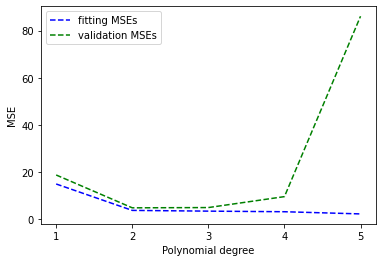

In [8]:
# plot validation curve
from matplotlib import pyplot as plt
plt.figure()
plt.plot(np.arange(1,max_polyDegree+1), overall_fit_MSEs, 'b--', label='fitting MSEs')
plt.plot(np.arange(1,max_polyDegree+1), overall_val_MSEs, 'g--', label='validation MSEs')
plt.legend(), plt.xlabel('Polynomial degree'), plt.ylabel('MSE')
plt.xticks(np.arange(1,max_polyDegree+1))
plt.show()